In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

### Let's create uncorrelated independent variable X and target y, to expose problem of large weights

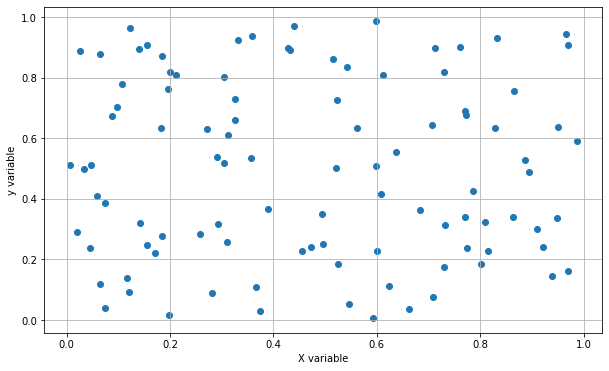

In [10]:
np.random.seed(42)

X = np.random.rand(100)
y = np.random.rand(100)

plt.figure(figsize=(10, 6))

plt.scatter(X, y)

plt.xlabel('X variable')
plt.ylabel('y variable')
plt.grid()
plt.show()

#### Base implementation of Linear Regression without any regularization 

In [12]:
from sklearn.linear_model import LinearRegression

# add another dimension to X as sklearn LinReg expects at least 2d array
X = np.expand_dims(X, 1)

lin_reg = LinearRegression()

lin_reg.fit(X, y)

LinearRegression()

In [27]:
# Slope and intercept
lin_reg.coef_[0], lin_reg.intercept_

(-0.03353164387961974, 0.5135976564010359)

In [23]:
# Prediction to plot Linear line
y_pred = lin_reg.predict(X)

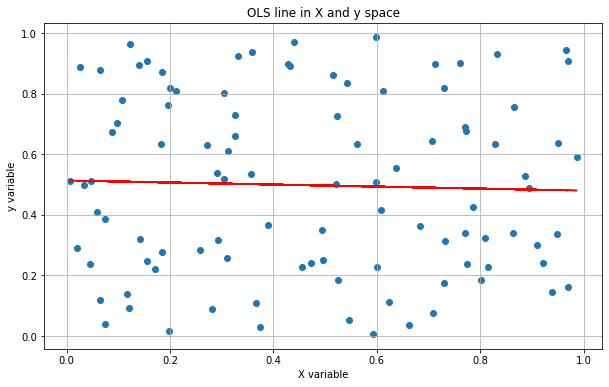

In [25]:
plt.figure(figsize=(10, 6))

plt.scatter(X, y)

plt.plot(X, y_pred, 'red')

plt.xlabel('X variable')
plt.ylabel('y variable')
plt.grid()
plt.title('OLS line in X and y space')
plt.show()

In [29]:
# Same problem, but this time using Lasso
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X, y)

y_pred_lasso = lasso.predict(X)

lasso.coef_[0], lasso.intercept_

(-0.0, 0.497831723155023)

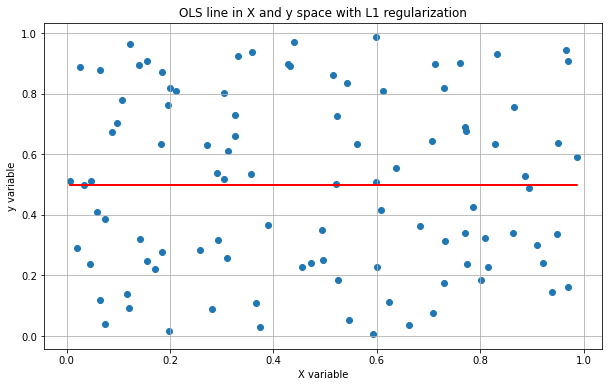

In [30]:
plt.figure(figsize=(10, 6))

plt.scatter(X, y)

plt.plot(X, y_pred_lasso, 'red')

plt.xlabel('X variable')
plt.ylabel('y variable')
plt.grid()
plt.title('OLS line in X and y space with L1 regularization')
plt.show()

Lasso (L1 regulariztion) nullifies weights of columns that do not impact to target variable with the help of penalizing model if it sets high values to weights

In [33]:
# Example with 100 columns
np.random.seed(42)
X = np.random.rand(100, 100)
y = np.random.rand(100)

lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.coef_

array([-0.65049569, -0.20272657,  0.43436555, -0.15884822,  0.475651  ,
       -0.31920925, -0.26542996, -0.31028616,  0.03058564,  0.15169681,
        1.00319187,  0.08763769,  0.04987911, -0.01727105, -0.12546834,
       -0.27255546, -0.48516003,  0.17924963,  0.15843141,  0.21585892,
        0.23619296, -0.11280763,  0.40934546, -0.53241582,  0.30436068,
       -0.102072  , -0.48591536,  0.77749707, -0.26523322, -0.13429793,
        0.39743094,  0.43858958,  0.10337945,  0.01309279, -0.32827718,
        0.66481177,  0.87870899,  0.60281875,  0.17503566, -0.24371336,
       -0.06612639,  0.33732179, -0.21204187,  0.24329624,  0.08380955,
        0.00807378, -0.16697607, -0.18610326,  0.21041799,  0.01465045,
       -0.12795514, -0.31593922, -0.19332   , -0.20389918, -0.07024615,
       -0.64676823, -0.34951506, -0.07783029,  0.08667996, -0.14310446,
       -0.3845094 , -0.08768066,  0.86882793,  0.24845082, -0.05648104,
        0.30536787,  0.1603872 ,  0.08640711,  0.62267413,  0.48

As we can see there is no weights set to zero, let's check Lasso

In [34]:
lasso = Lasso()

lasso.fit(X, y)

lasso.coef_

array([-0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,
        0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,
       -0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
        0., -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,
       -0.,  0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,
       -0., -0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,
        0., -0., -0.,  0., -0.,  0.,  0.,  0., -0.])

In case of Lasso, all weights are set to zero